In [1]:
import spacy

import pandas as pd
import numpy as np
import seaborn as sns

In [23]:
df = pd.read_csv('../data/obligation_extraction_df.csv')
df.sample(10)

,sentence,is_obligation
12040,Master Licensee will take all commercially rea...,True
12020,"Title to the Software and all patents, copyrig...",False
2467,"Except for monetary obligations hereunder, or ...",False
2461,16.1 Neither party shall be liable for failure...,False
11365,Company agrees that the Consultant Marks and a...,False
207,"Except for the payment of money, neither party...",False
9380,"(a) The Executive shall not, during the Term o...",False
2945,"10.1 Except for payment due hereunder, neither...",False
11394,Each Party or their respective licensors and t...,False
5931,Basic Rent shall be payable to Landlord by sep...,True


In [24]:
print(f'Dataframe shape: {df.shape}', '\n')
print(df.is_obligation.value_counts())

Dataframe shape: (14945, 2) 

True     7944
False    7001
Name: is_obligation, dtype: int64


In [31]:
# Obligation examples

df.sentence[df.is_obligation].iloc[0:5].values

array(['The affected Party shall use its best efforts to avoid or remove the cause of nonperformance and both Parties shall proceed to perform with dispatch once the causes are removed or cease.',
       'The Borrower will use its best efforts to remedy with all reasonable dispatch the Force Majeure preventing the Borrower from performing or observing its agreements under this Loan Agreement; provided, that the settlement of strikes, lockouts and other industrial disturbances shall be entirely within the discretion of the Borrower, and the Borrower shall not be required to make settlement of strikes, lockouts and other industrial disturbances by acceding to the demands of the opposing party or parties.',
       'The time for performance of any act delayed by such causes shall be postponed for a period equal to the delay; provided, however, that the party so affected shall give prompt notice to the other party of such delay.',
       'The party so affected, however, shall use its best e

In [32]:
# Non obligtion examples

df.sentence[~df.is_obligation].iloc[0:5].values

array(['25.0 FORCE MAJEURE: If the Distributor shall be prevented from transmitting and delivering the Video Programs or the Service and its Affiliates shall be prevented from receiving and transmitting the Video Programs by reason of Force Majeure, then such party, as the case may be, shall be excused from its failure to perform its obligations under this License Agreement.',
       "Force Majeure shall mean any act of God, fire, flood, war, public disaster, any governmental or quasi-governmental or regulatory commission or association enactment, decree determination or action, regulation or order; any court imposed injunction; or any other occurrence beyond such party's reasonable control which, despite their reasonable efforts, prevents the delivery and/or exhibition of the Video Program.",
       '15.1 Notwithstanding anything in this Agreement to the contrary, no default, delay or failure to perform on the part of either Party shall be considered a breach of this Agreement if such

In [45]:
obligations_len = df.sentence[df.is_obligation].apply(lambda sentence: len(sentence)).values
non_obligations_len = df.sentence[~df.is_obligation].apply(lambda sentence: len(sentence)).values

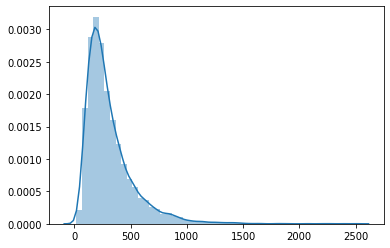

In [49]:
sns.distplot(obligations_len)

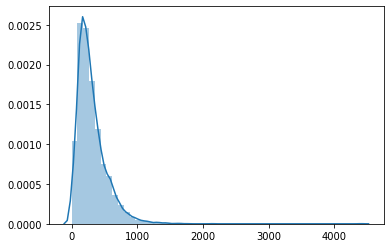

In [50]:
sns.distplot(non_obligations_len)

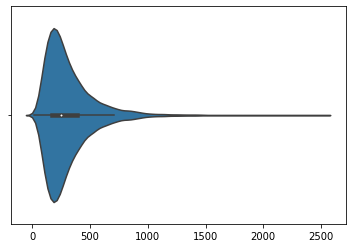

In [53]:
sns.violinplot(obligations_len)

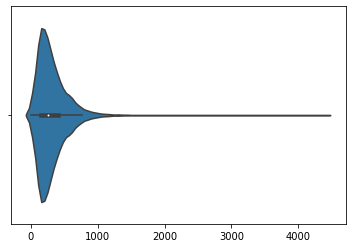

In [55]:
sns.violinplot(non_obligations_len)

In [4]:
!python3 -m spacy download en_core_web_lg

     |████████████████████████████████| 826.9MB 2.4MB/s eta 0:00:015   |███▏                            | 80.8MB 821kB/s eta 0:15:09     |████▉                           | 124.0MB 1.1MB/s eta 0:11:04     |█████▏                          | 132.4MB 286kB/s eta 0:40:25     |██████▎                         | 163.5MB 760kB/s eta 0:14:33     |██████████                      | 257.0MB 580kB/s eta 0:16:22     |██████████▏                     | 262.1MB 1.1MB/s eta 0:08:58     |███████████                     | 285.3MB 850kB/s eta 0:10:37     |█████████████▌                  | 347.7MB 166kB/s eta 0:47:53     |█████████████▋                  | 350.9MB 579kB/s eta 0:13:42     |██████████████████▉             | 485.4MB 3.9MB/s eta 0:01:27     |████████████████████▎           | 525.0MB 1.1MB/s eta 0:04:43     |█████████████████████▏          | 547.4MB 849kB/s eta 0:05:30     |███████████████████████         | 593.6MB 1.0MB/s eta 0:03:54     |███████████████████████▊        | 611.9MB 786kB/s eta 0:04

In [3]:
nlp = spacy.load('en_core_web_lg')

OSError: [E050] Can't find model 'en_core_web_lg'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [73]:
oov = []

In [74]:
docs = nlp.pipe(df.sentence.values)

In [75]:
for sent in docs:
    for token in sent:
        if token.is_oov:
            oov.append(token.text)

In [77]:
oov = pd.Series(oov)

In [99]:
print(len(oov.value_counts()))

1822


In [79]:
oov.value_counts()

number             231
Subtenant          114
Sublandlord         81
Indemnitee          80
agent               73
Sublessee           55
Sublessor           50
Demised             48
mark                39
InterTrust          29
Deliverables        29
WCMA                25
MIKOHN              22
PalmSource          22
Sublicensee         22
deCODE              21
eLoyalty            21
MLBFS               20
409A                20
ZixIt               19
sublicensees        17
HireRight           17
ratable             16
N2P                 16
VaxGen              16
Intelligroup        15
Scient              15
setoff              15
Saxonia             14
NextCard            14
                  ... 
insured/             1
Subdistributors      1
Affymetrix           1
Atyrau               1
15.4.Any             1
2,016,000.00         1
6231                 1
12,661.67            1
IPPO                 1
b)(3                 1
00/100ths            1
Visionics            1
www.usps.co

In [98]:
oov.value_counts()[50:100]

obligation(s    11
Acquiror        11
Primestar       11
Biotec          11
Netpliance      11
Mitotix         11
Net2Phone       10
D&T             10
SAVVIS          10
Packeteer       10
NO/100          10
eRoom           10
Biovail          9
Acologix         9
00/100           9
Pledgor          9
PRIMEDIA         9
LodgeNet         9
Lindows.com      9
assignee(s       9
TracMed          9
OpenTV           9
3(b              9
Finisar          9
IPIX             8
Onvia            8
Mashinsky        8
Egenera          8
RedRoller        8
GlobalCenter     8
Discloser        8
EpiCept          8
LTIP             8
Subprocessor     8
eDiets           8
Pledgee          8
Indemnitees      8
eVS              8
Providian        8
10(a             8
StoresOnline     8
5(b              8
WCFC             7
Spansion         7
2.3(c            7
hereinabove      7
Product(s        7
5(a              7
Codexis          7
ORBITZ           7
dtype: int64

In [105]:
def process_text(text):
    text = re.sub('(\.|,|\?|!|-|;|\*|"|:|—|\(|\)|%|#|\$|&|_|\/|@)', '', text)
    
    return text

In [2]:
dir(nlp)

NameError: name 'nlp' is not defined